In [1]:
import sympy as sy
from sympy import lambdify
from matplotlib import pyplot as plt
import numpy as np

In [2]:
x = sy.symbols('x')

In [3]:
sy.diff(sy.cos(x), x)

-sin(x)

In [4]:
def diff_f():
    '''
    A function that we want to differentiate
    '''
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    df = sy.diff(f)
    return sy.lambdify(x, df, 'numpy')

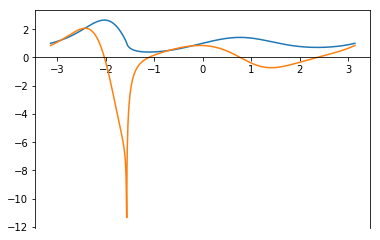

In [5]:
x = np.linspace(-np.pi, np.pi, 1000)
df = diff_f()
plt.plot(x, (np.sin(x) + 1) ** (np.sin(np.cos(x))))
plt.plot(x, df(x))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

Problem 2

In [6]:
def forward_01(f, x, h):
    df = []
    for i in range(len(x)):
        df.append((f(x[i]+h) - f(x[i]))/h)
    return df

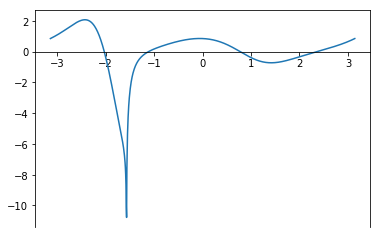

In [7]:
f = lambda x: (np.sin(x) + 1) ** (np.sin(np.cos(x)))
plt.plot(x, forward_01(f, x, .001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

In [8]:
def forward_02(f, x, h):
    df = []
    for i in range(len(x)):
        df.append( (4*f(x[i]+h) - 3*f(x[i]) - f(x[i]+2*h) )/ (2*h))
    return df

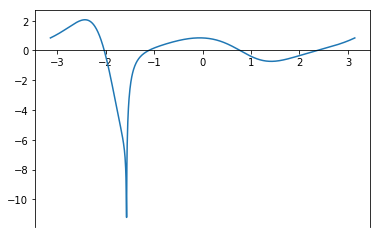

In [9]:
plt.plot(x, forward_02(f, x, .001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

In [10]:
def backward_01(f, x, h):
    df = []
    for i in range(len(x)):
        df.append((-f(x[i] - h) + f(x[i]))/h)
    return df

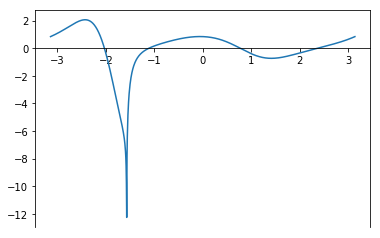

In [11]:
plt.plot(x, backward_01(f, x, .001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

In [12]:
def backward_02(f, x, h):
    df = []
    for i in range(len(x)):
        df.append( (-4*f(x[i]-h) + 3*f(x[i]) + f(x[i]-2*h) )/ (2*h))
    return df

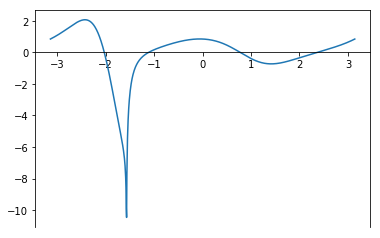

In [13]:
plt.plot(x, backward_02(f, x, .001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

In [14]:
def centered_02(f, x, h):
    df = []
    for i in range(len(x)):
        df.append((f(x[i]+h) - f(x[i] - h))/ (2*h))
    return df

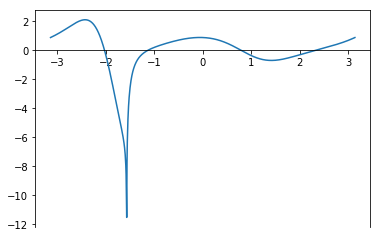

In [15]:
plt.plot(x, centered_02(f, x, .001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

In [16]:
def centered_04(f, x, h):
    df = []
    for i in range(len(x)):
        df.append( (f(x[i]-2*h) - 8*f(x[i]-h) + 8*f(x[i]+h) - f(x[i]+2*h) )/ (12*h))
    return df

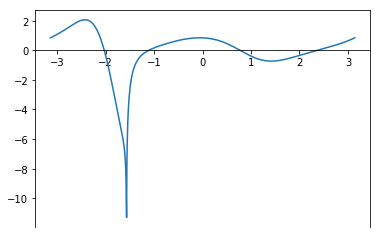

In [17]:
plt.plot(x, centered_04(f, x, .001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

Problem 3

In [18]:
def optimal_h_plot(x_0):
    '''
    Plots the Difference between the true differential of f and 
    '''
    df = diff_f()
    true_df = df(x_0)
    hs = np.logspace(-8, 0, 9) 
    print(hs)
    f = lambda x: (np.sin(x) + 1) ** (np.sin(np.cos(x)))
    fig = plt.figure(figsize = [16, 10])
    funcs = [forward_01, forward_02, backward_01, backward_02, centered_02, centered_04]
    for func in funcs:
        tmp = []
        for h in hs:
            val = func(f, [x_0], h)
            tmp.extend(abs(true_df - val))
        print(tmp)
        plt.plot(hs, tmp, 'o-', label = func.__name__)
        plt.yscale('log')
        plt.ylim(10**(-14), 1)
        plt.xscale('log')
        plt.xlim(10**(-8), 1)
    plt.legend(loc='upper left')

In [19]:
forward_01(f, [1], .0001)

[-0.39661733189477744]

[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00]
[1.3096270068402305e-08, 7.748920549666138e-08, 7.693801944430589e-07, 7.694840399696812e-06, 7.694447531503279e-05, 0.0007690585267188244, 0.00765157071879341, 0.07224501706561681, 0.20250200030554089]
[1.3096270068402305e-08, 8.838167975255828e-10, 2.264062270995737e-10, 1.0666062477682203e-10, 8.574331689104042e-09, 8.599811656129219e-07, 8.834833758064597e-05, 0.01085227274690781, 0.5648048227346802]
[9.108190424100826e-09, 7.572157190161022e-08, 7.696109622923331e-07, 7.694937940894153e-06, 7.69530482986891e-05, 0.0007699158652048066, 0.007737300300668215, 0.0807755720711596, 0.7655281221262482]
[1.9940398221507394e-09, 1.9940398221507394e-09, 2.264062270995737e-10, 5.1149473545564206e-11, 8.574331689104042e-09, 8.546902867667683e-07, 8.305920477114093e-05, 0.005704002941470554, 0.6438916027747112]
[1.9940398221507394e-09, 8.838167975255828e-10, 1.1538392463705804e-10, 4.877059867069988e-11, 4.286491828153771e-09, 4.

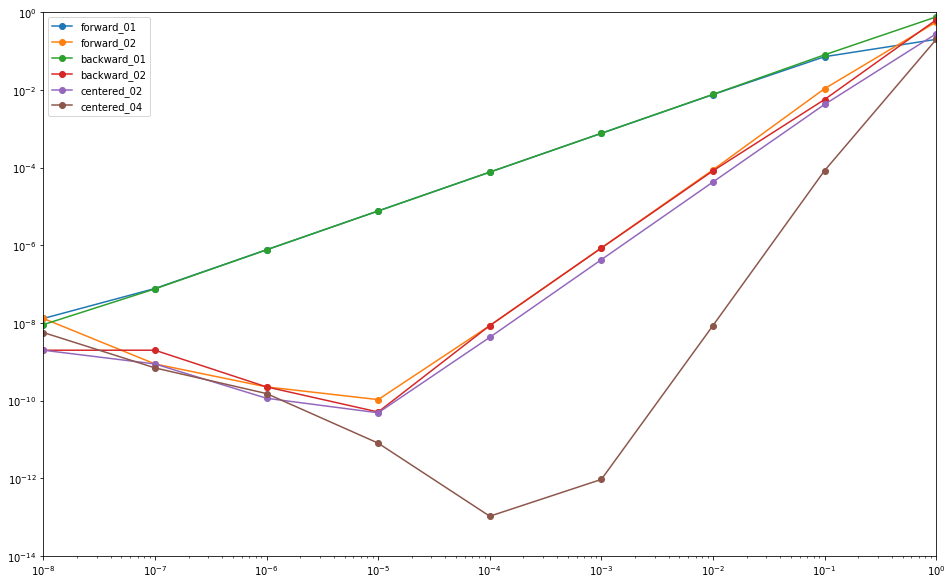

In [20]:
optimal_h_plot(1)

Problem 5

In [21]:
from inspect import signature
import numpy as np

def Jacobian(f, x_0, h):
    n = len(x_0)
    m = len(f(x_0))
    jacob = np.zeros((m, n))
    print(jacob)
    ide = np.identity(n)
    for j in range(n):
        jacob[:,j] = ( f(x_0 + (h * ide[j])) - f(x_0 - (h * ide[j])) ) / (2*h)  
    return jacob 

In [22]:
g = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1], x[0]*x[1]])
Jacobian(g, [9,4], .001) 

[[0. 0.]
 [0. 0.]
 [0. 0.]]


array([[ 18.      ,   0.      ],
       [243.000001,  -1.      ],
       [  4.      ,   9.      ]])

Problem 6

In [23]:
import sys 
!{sys.executable} -m pip install autograd

In [24]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

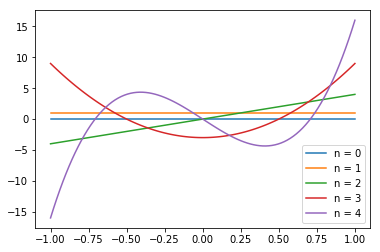

In [42]:
def Chebyshev(x, n):
    if n == 1: 
        return x
    elif n == 0:
        return anp.ones_like(len(x))
    else:
        return 2*x*Chebyshev(x, n-1) - Chebyshev(x, n-2)
    
dcheb = elementwise_grad(Chebyshev)
x = anp.linspace(-1, 1, 100)
for n in range(5):
    plt.plot(x, dcheb(x, n), label="n = {}".format(n))
plt.legend(loc="lower right")